In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

pd.options.display.max_columns = None
#pd.set_printoptions(max_columns=500)

In [3]:
TRAIN = pd.read_csv("../datasources/mnsit/train.csv", delimiter=',') #, skiprows=1)
TEST = pd.read_csv("../datasources/mnsit/test.csv", delimiter=',') #, skiprows=1)
X_TRAIN = TRAIN.copy()
X_TEST = TEST.copy()
y = TRAIN.label
del X_TRAIN["label"]

In [4]:
X_TRAIN.shape

(42000, 784)

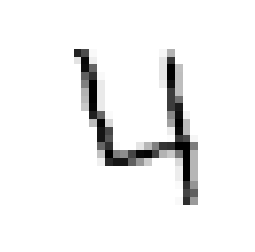

In [5]:
# returns the image in digit (28x28)
def getImageMatriceDigit(dataset, rowIndex):
    return dataset.iloc[rowIndex, 0:].values.reshape(28,28)
# returns the image matrix in one row
def getImageLineDigit(dataset, rowIndex):
    return dataset.iloc[rowIndex, 0:]

imgDigitMatrice = getImageMatriceDigit(X_TRAIN, 3)
imgDigit = getImageLineDigit(X_TRAIN, 3)
plt.imshow(imgDigitMatrice, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Entrainement d'un classifier multic-étiquette linéaire (Descente de gradient stochastique)

In [6]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_TRAIN, y)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Vérification de la prédiction sur l'image précédente

In [7]:
sgd.predict([getImageLineDigit(X_TRAIN, 3)])

array([4])

In [8]:
print ("Score Train -->", round(sgd.score(X_TRAIN, y) *100,2), " %")

Score Train --> 85.88  %


# Préparation du jeu de données résultat (kaggle)

In [11]:
p_test = sgd.predict(X_TEST)

In [ ]:
result = pd.DataFrame(X_TEST.index + 1, columns=['ImageId'])
pred = pd.DataFrame(p_test, columns=['Label'])
result = result.join(pred)
result.to_csv("./data/result.csv", columns=["ImageId", "Label"], index=False)

## Score kaggle : 0.84642